Two Bidimensional Unimodal Gaussian Classes.
100 batches of 950 instances



METHOD: Static lp as classifier
Execution time:  3.2563337359017117
Average MCC:  -0.111985338775
Average macro-F1: 0.44250211658846106
Average Accuracy:  44.196
Standard Deviation:  34.8985164728
Variance:  1217.906452


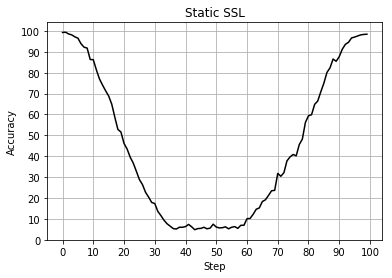

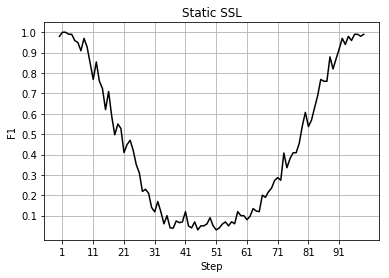




METHOD: Sliding lp as classifier
Execution time:  2.919283657422606
Average MCC:  0.907236138707
Average macro-F1: 0.9514277392581431
Average Accuracy:  95.0396
Standard Deviation:  4.50263365598
Variance:  20.27370984


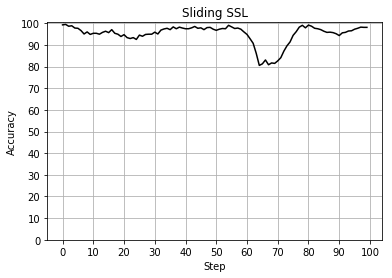

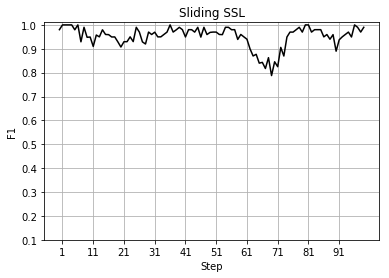




METHOD: Incremental lp as classifier
Execution time:  111.52896181210289
Average MCC:  -0.0856760185493
Average macro-F1: 0.45465014174028723
Average Accuracy:  45.5858
Standard Deviation:  33.0639517656
Variance:  1093.22490636


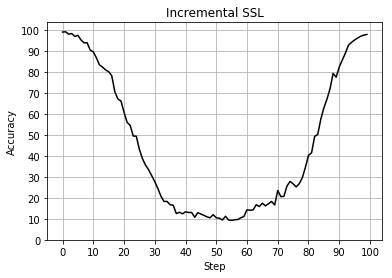

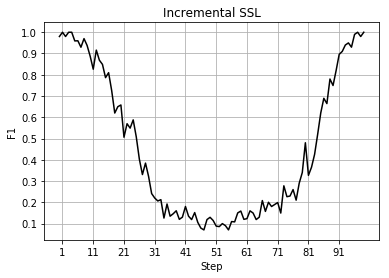




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  11.771337210473732
Average MCC:  0.917368162776
Average macro-F1: 0.9581827256021489
Average Accuracy:  95.7064
Standard Deviation:  3.45782779213
Variance:  11.95657304


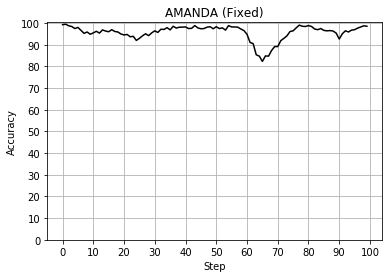

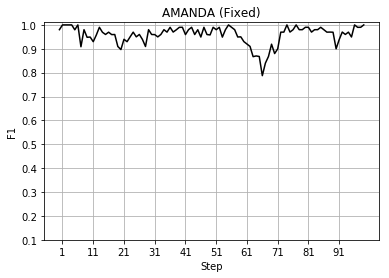




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  12.89160678511422
Average MCC:  0.755099459992
Average macro-F1: 0.870678641025703
Average Accuracy:  87.3627
Standard Deviation:  12.526248988
Variance:  156.90691371


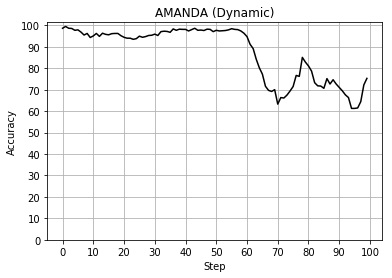

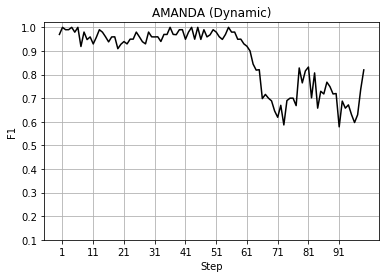




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  58.17934915083356
Average MCC:  0.899507880287
Average macro-F1: 0.9491559475301499
Average Accuracy:  94.6829
Standard Deviation:  5.45424665651
Variance:  29.74880659


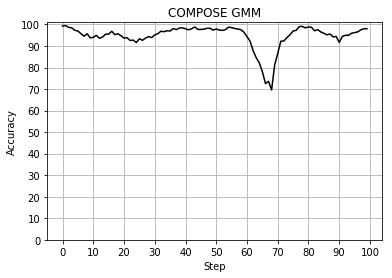

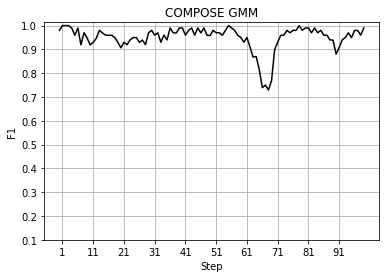




Method: Level IW
Execution time:  58.17934915083356
Average MCC:  -0.0115408771991
Average macro-F1: 0.49173429426272214
Average Accuracy:  73.662105
Standard Deviation:  33.3331970179
Variance:  1111.10202344


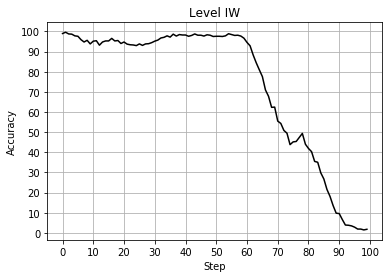

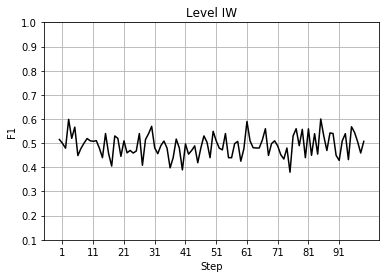

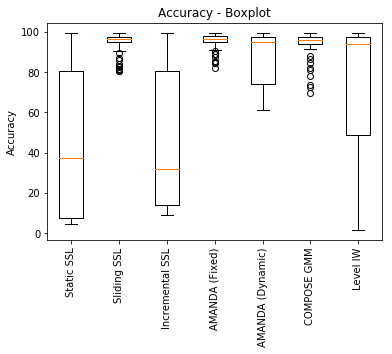

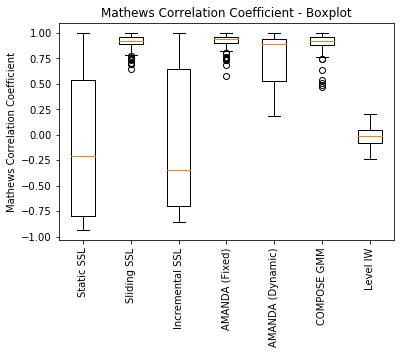

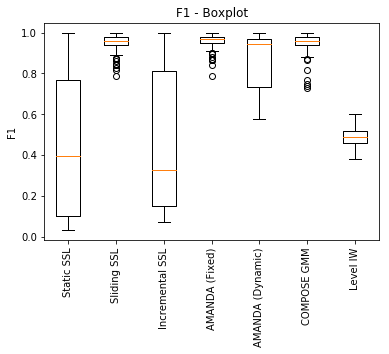

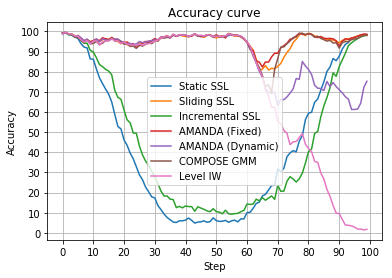

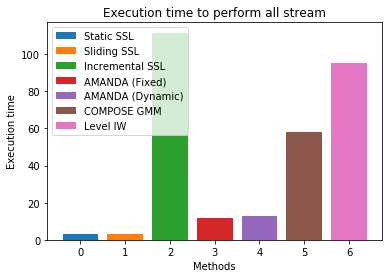

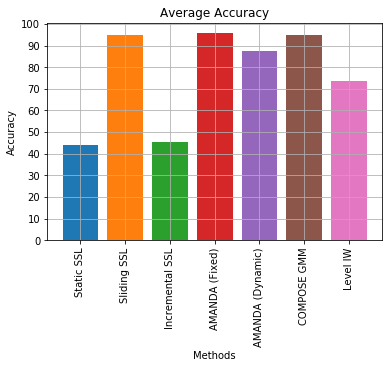

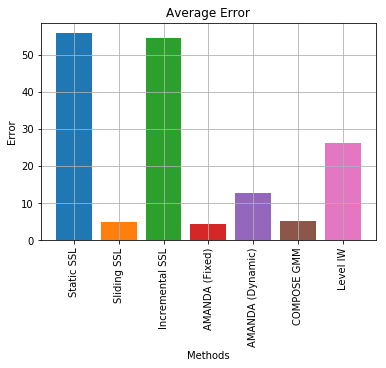

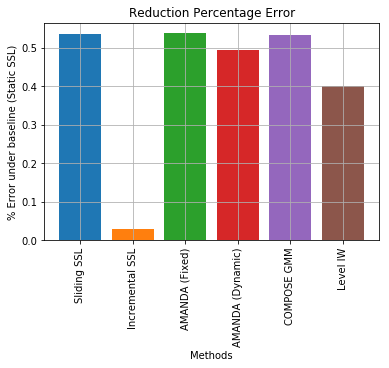

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadUG_2C_2D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.85, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", 'knn')

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'UG_2C_2D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()